# Read the mnist dataset

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

Train data is 60000 image.
Test data is 10000 image.
The 1-10 number in this datasets are:


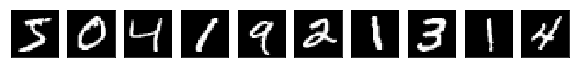

In [2]:
print("Train data is %d image." % len(x_train))
print("Test data is %d image." % len(x_test))
print("The 1-10 number in this datasets are:")
fig = plt.figure(figsize=(10,10))
for i in range(10):
    ps = fig.add_subplot(1,10,i+1, xticks=[], yticks=[])
    ps.imshow(x_train[i], cmap='gray')


# Normalization

In [3]:
x_train, x_test = x_train / 255.0, x_test / 255.0

# Build the model

## optimizer
- sgd
- **adam**
- rmsprop
- adagrad
- adadelta
- adamax
- nadam

## Losses
- mean_squared_error
- mean_absolute_error
- mean_absolute_percentage_error
- mean_squared_logarithmic_error
- squared_hinge
- hinge
- categorical_hinge
- logcosh
- categorical_crossentropy
- binary_crossentropy
- kullback_leibler_divergence
- poisson
- cosine_proximity
- **sparse_categorical_crossentropy**

## metrics
- binary_accuracy
- categorical_accuracy
- sparse_categorical_accuracy
- top_k_categorical_accuracy
- sparse_top_k_categorical_accuracy
- **accuracy**

In [4]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2), 
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


# Fit data and evaluate the model

In [5]:
model.fit(x_train, y_train, epochs=5)

model.evaluate(x_test, y_test)

Epoch 1/5
60000/60000 [==============================] - 5s 86us/step - loss: 0.2021 - acc: 0.9402
Epoch 2/5
60000/60000 [==============================] - 5s 76us/step - loss: 0.0808 - acc: 0.9751
Epoch 3/5
60000/60000 [==============================] - 5s 76us/step - loss: 0.0509 - acc: 0.9842
Epoch 4/5
60000/60000 [==============================] - 4s 75us/step - loss: 0.0371 - acc: 0.9882
Epoch 5/5
10000/10000 [==============================] - 0s 31us/step


[0.06518870207720902, 0.9819]

In [6]:
model.save_weights('models/mnist.h5')

model_json = model.to_json()
with open('models/mnist.json', 'w') as file:
    file.write(model_json)

[[2.7018110e-09 1.2744548e-09 2.0558186e-08 8.2410416e-08 2.0068457e-14
  8.9304003e-10 2.8264606e-13 9.9999988e-01 1.1213994e-09 1.2479616e-08]]
[[1.4709086e-11 2.0188538e-05 9.9997973e-01 8.8625256e-08 4.0398982e-16
  1.0651078e-09 7.0060652e-11 2.8894920e-13 2.7553870e-08 6.2094949e-14]]
[[1.04728855e-07 9.99895811e-01 1.90555547e-05 1.59589078e-07
  3.05443427e-05 1.51691256e-06 2.36130575e-07 3.18434322e-05
  2.07028643e-05 4.09793373e-08]]
[[9.9998415e-01 9.5284808e-11 1.2139642e-05 5.2308585e-10 1.4685471e-10
  4.4097610e-09 6.0197601e-07 3.0656377e-06 8.8742055e-11 6.2596612e-09]]
[[1.5493207e-07 1.0326647e-09 3.4726416e-08 2.8589667e-10 9.9899417e-01
  1.4426446e-09 1.3602892e-07 6.7684368e-06 1.2234847e-07 9.9857978e-04]]
[[1.24701867e-08 9.99877334e-01 4.83751812e-08 1.44250025e-08
  7.67007587e-05 5.33123323e-09 7.75026932e-10 4.50474981e-05
  8.10622225e-07 5.34027089e-09]]
[[2.2684899e-12 1.9798675e-10 3.9700580e-11 1.8508247e-11 9.9997532e-01
  3.9715459e-07 3.0185717e-0

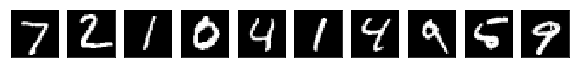

In [7]:
fig = plt.figure(figsize=(10,10))
for i in range(10):
    ps = fig.add_subplot(1,10,i+1, xticks=[], yticks=[])
    ps.imshow(x_test[i], cmap='gray')
    result = model.predict(x_test[i].reshape(1,28,28))
    print (result)

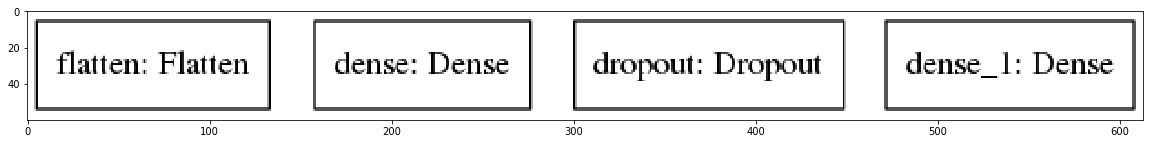

In [8]:
tf.keras.utils.plot_model(model, to_file='models/mnist.png')
import cv2
img = cv2.imread('models/mnist.png',3)
fig = plt.figure(figsize=(20, 20))
m1 = plt.imshow(img)
plt.show()